# DATASET

**About Dataset**

1). Context:
    Kumpulan data ini adalah catatan kejahatan di wilayah metropolitan utama, seperti London, yang terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori mayor/minor dari Jan 2008-Des 2016.

2). Content:
    13 juta baris berisi jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori mayor/minor.
    
3). Column List

   - lsoa_code = merepresentasikan kode area polisi
   - borough = daerah di london yang terkait
   - major_category = kategori kejahatan mayor
   - minor_category = kategori kejahatan minor
   - value = jumlah kejahatan untuk wilayah tertentu pada bulan tertentu
   - year = statistik ringkasan tahunan
   - month = statistik ringkasan bulanan

# DATA PREPROCESSING

Data preprocessing adalah tahap di mana analis mempersiapkan data agar dapat digunakan untuk analisis lebih lanjut. Preprocessing meliputi tahapan seperti membersihkan data dari missing values, data yang duplikat, dan outlier, menggabungkan data dari berbagai sumber, melakukan transformasi data, mengurangi dimensi data, dan melakukan pembagian data kontinu menjadi kategori tertentu. Preprocessing bertujuan untuk memastikan bahwa data yang digunakan untuk analisis lebih lanjut bersih, terstruktur, dan relevan dengan masalah yang sedang dihadapi.

**Import Library**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fo
import calendar

from calendar import month
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 500)

**read csv dan cek missing value**

In [70]:
#read cvs file
missing_values = ["n/a", "na", "--"]
df_crime = pd.read_csv('london_crime_by_lsoa.csv', na_values=missing_values)

In [71]:
#cek 5 data teratas
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [72]:
#cek 5 data terbawah
df_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [73]:
#cek nama column
column = df_crime.columns
column

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [74]:
#cek dimensi data
baris,kolom = df_crime.shape
print('Jumlah kolom dan baris yang terdapat pada dataset, yaitu: ')
print(kolom, ' Kolom')
print(baris, ' Baris')

Jumlah kolom dan baris yang terdapat pada dataset, yaitu: 
7  Kolom
13490604  Baris


In [75]:
#cek tipe data
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [76]:
#cek jumlah data unik
unik = df_crime.nunique()
unik

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [77]:
#ubah tipe data month dan isinya
for i in range(0,12):
    df_crime['month'] = df_crime['month'].replace(i+1, calendar.month_name[i+1])

#cek data
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,November
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,November
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,May
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,March
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,June


In [78]:
#cek data kembali
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           object
dtypes: int64(2), object(5)
memory usage: 720.5+ MB


In [79]:
#cek data unik
string_columns = list(df_crime.select_dtypes(['object']).columns)
integer_columns = list(df_crime.select_dtypes(['int64']).columns)

for col in string_columns:
    print(f'{col} : {df_crime[col].unique()}')

lsoa_code : ['E01001116' 'E01001646' 'E01000677' ... 'E01001562' 'E01002598'
 'E01001111']
borough : ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category : ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category : ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' '

In [80]:
#cek data unik integer
for col in integer_columns:
    print(f'{col} : {df_crime[col].unique()}')

value : [  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 190 286 258 182 175 198 262 251 23

In [81]:
#cek jumlah data duplikat
df_duplikat = df_crime.duplicated().sum()
df_duplikat

0

In [82]:
#cek missing value
for col in column:
    missing = df_crime[col].isnull().sum()
    print(f'{col} : {missing}')

lsoa_code : 0
borough : 0
major_category : 0
minor_category : 0
value : 0
year : 0
month : 0


In [83]:
#total jumlah missing value
print('Total jumlah missing value adalah: ', df_crime.isnull().sum().sum())

Total jumlah missing value adalah:  0


Dari dataset diatas sudah tidak terdapat missing value,baik itu Standard Missing Values maupun Non-Standard Missing Values. Selain itu, tipe data pun sudah disesuaikan, maka selanjutnya dapat diteruskan ke tahap Analisis data.

# ANALISIS DATA

*Membuat Variabel Global Untuk Kebutuhan Analisis*

In [84]:
#borough
borough = list(df_crime['borough'].unique())

#year
year = list(map(int, np.sort(df_crime['year'].unique())))

#month
month = list(df_crime['month'].unique())

#major_category
major_category = list(df_crime['major_category'].unique())

#minor_category
minor_category = list(df_crime['minor_category'].unique())


#### Mencari Total Kasus Kejahatan Untuk Setiap Wilayah tiap Tahun

In [85]:
case_data = {}

for years in year:
    #ambil data per tahun dan groupby borough
    df_borough_years = df_crime[
        df_crime['year'] == years
    ].groupby('borough')['value'].sum()

    #membuat series untuk dataframe
    case_data[years] = pd.Series(
        data=map(int, df_borough_years.reset_index()['value'].values),
        index=df_borough_years.index
    )


#membuat dataframe
df_crime_borough = pd.DataFrame(
    columns=year,
    index=borough,
    data=case_data
)

df_crime_borough['Total'] = df_crime_borough[year].sum(axis=1)
df_crime_borough.sort_values(by='Total', ascending=False, inplace=True)
df_crime_borough.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


#### Mencari Total Kasus Kejahatan bulanan tiap Tahun

In [86]:
case_data = {}

for years in year:
    #ambil data per tahun dan groupby month
    df_crime_month_year = df_crime[
        df_crime['year'] == years
    ].groupby('month')['value'].sum()

    case_data[years] = pd.Series(
        data=map(int, df_crime_month_year.reset_index()['value'].values),
        index=df_crime_month_year.index
    )

#membuat dataframe kemudian urutan index sesuai dengan urutan month dan year
df_crime_month = pd.DataFrame(
    columns=year,
    index=month,
    data=case_data
)

df_crime_month['Total'] = df_crime_month[year].sum(axis=1)

#sort month sesuai kalender
remonth=month = list(map(lambda x: calendar.month_name[x], range(1,13)))

df_crime_month = df_crime_month.reindex(remonth)
df_crime_month.head()



,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
January,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
February,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
April,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


### Melihat Total Kasus Kejahatan Untuk Kejahatan Mayor tiap Tahun


In [87]:
case_data = {}

for years in year:
    #ambil data per tahun dan groupby major_category
    df_crime_mayor = df_crime[
        df_crime['year'] == years
    ].groupby('major_category')['value'].sum()

    #membuat series untuk dataframe
    case_data[years] = pd.Series(
        data=map(int, df_crime_mayor.reset_index()['value'].values),
        index=df_crime_mayor.index
    )


#membuat dataframe
df_crime_maj = pd.DataFrame(
    columns=year,
    index=major_category,
    data=case_data
)

df_crime_maj['Total'] = df_crime_maj[year].sum(axis=1)
df_crime_maj.sort_values(by='Total', ascending=False, inplace=True)
df_crime_maj.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


### Melihat Total Kasus Kejahatan Untuk Kejahatan Minor tiap Tahun

In [88]:
case_data = {}

for years in year:
    #ambil data per tahun dan groupby minor_category
    df_crime_minor = df_crime[
        df_crime['year'] == years
    ].groupby('minor_category')['value'].sum()

    #membuat series untuk dataframe
    case_data[years] = pd.Series(
        data=map(int, df_crime_minor.reset_index()['value'].values),
        index=df_crime_minor.index
    )


#membuat dataframe
df_crime_min = pd.DataFrame(
    columns=year,
    index=minor_category,
    data=case_data
)

df_crime_min['Total'] = df_crime_min[year].sum(axis=1)
df_crime_min.sort_values(by='Total', ascending=False, inplace=True)
df_crime_min.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


# Visualisasi Data

##### 1. Histogram

Pertanyaan:

1. Bagaimana distribusi frekuensi total kasus kejahatan yang terjadi di setiap wilayah di kota London pada setiap tahunnya?

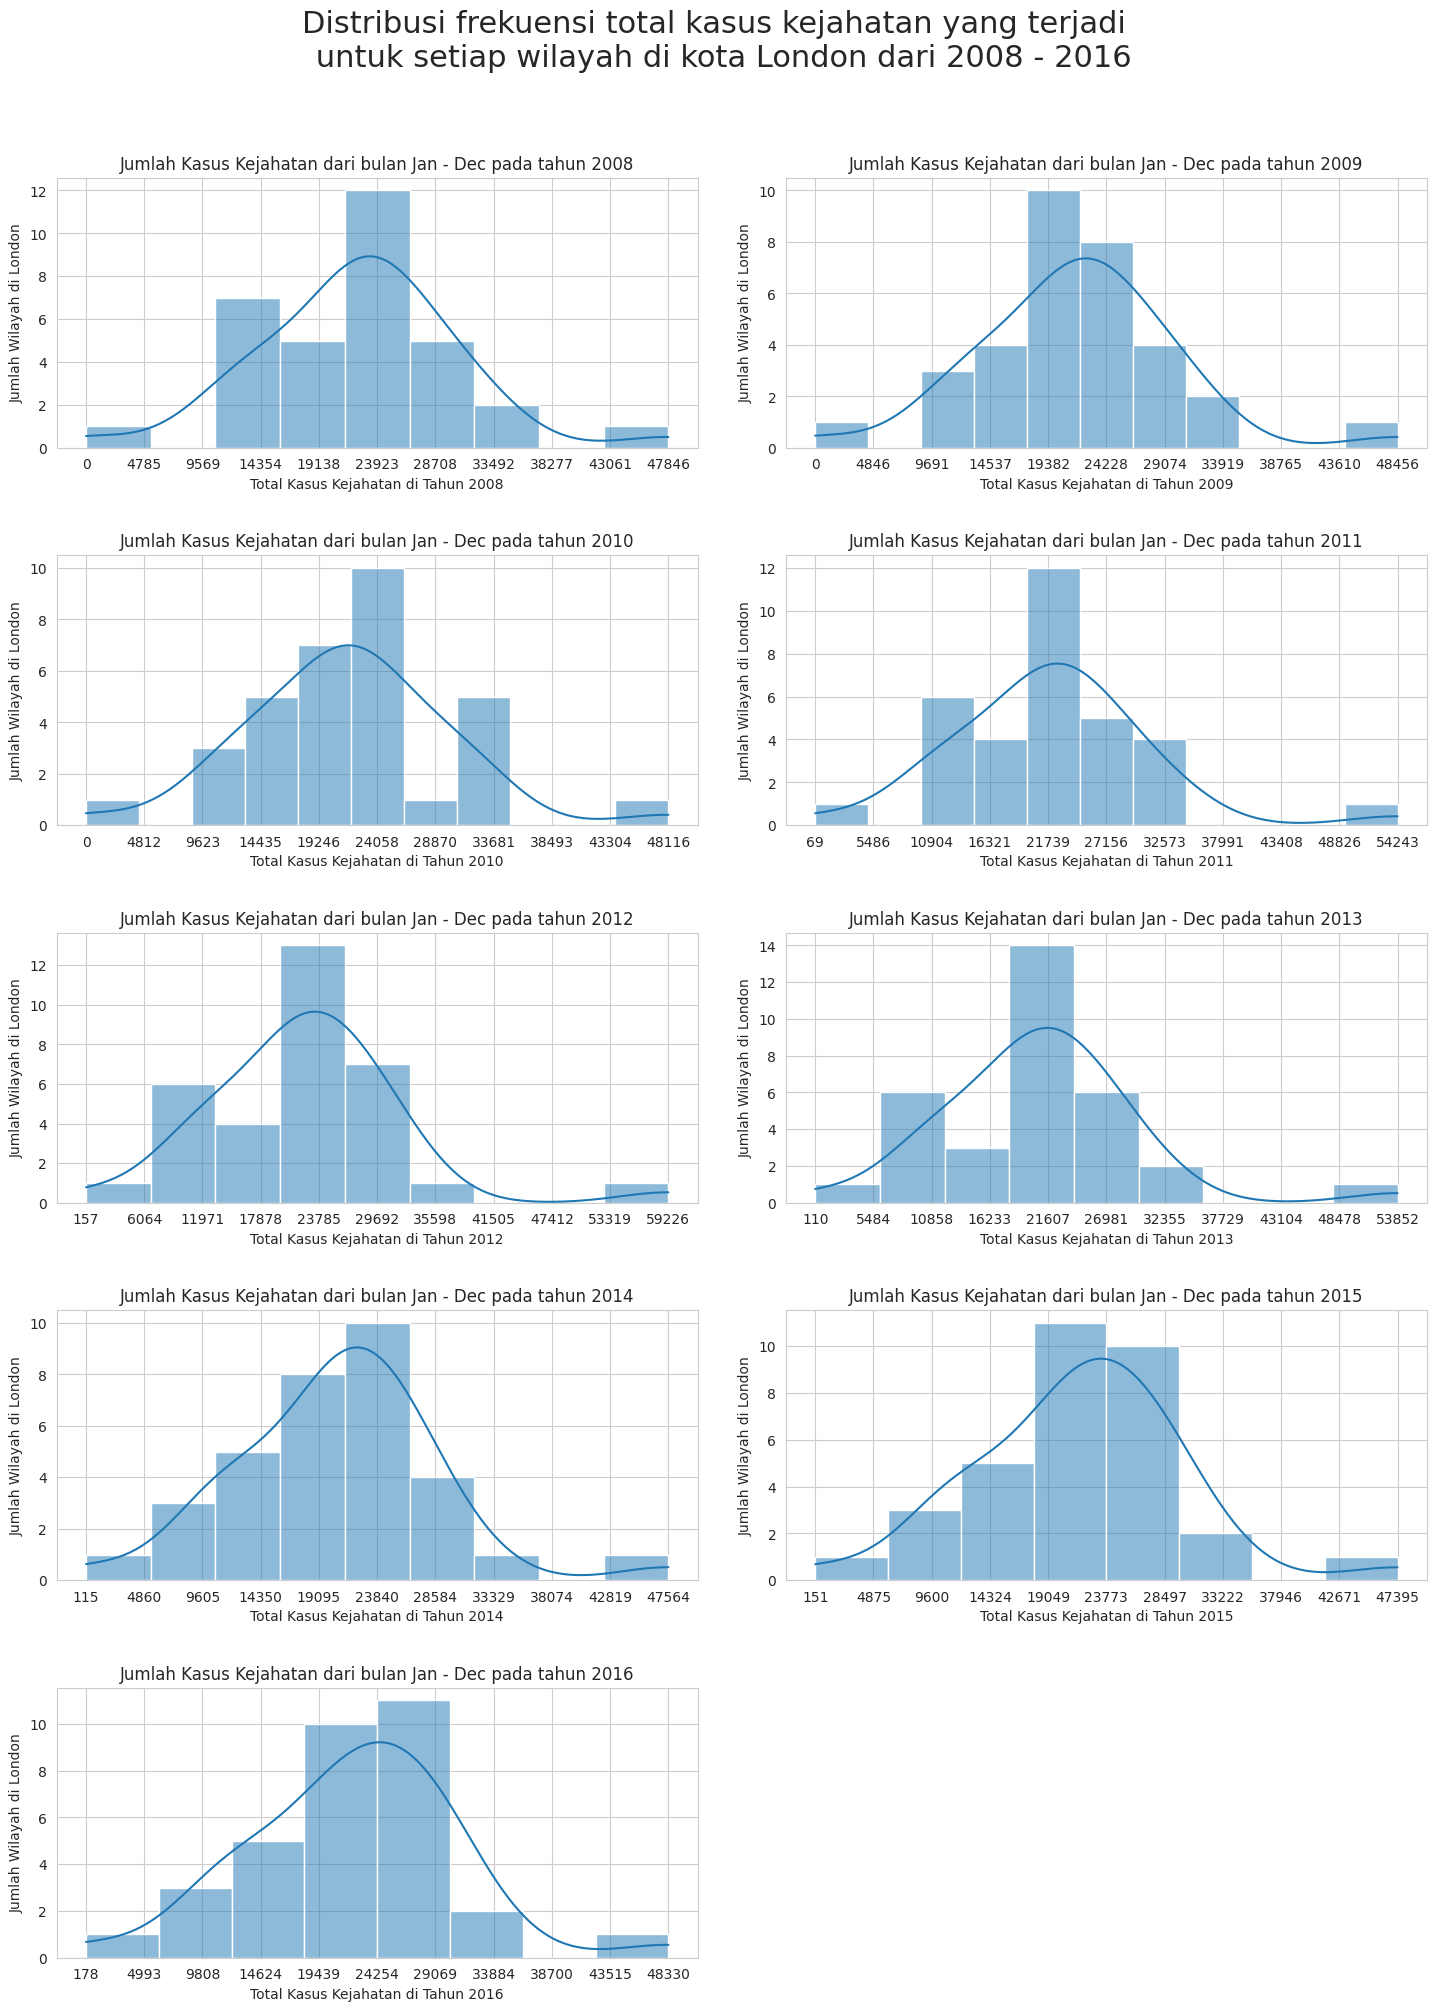

In [89]:
n_rows = int(len(year))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) 
ax_s = [] 

plot_number = 1 

for tahun in year:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_crime_borough[year][tahun])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_crime_borough[year][tahun],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(tahun), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    #increment plot_number setiap looping years
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)
plt.show()

##### Insight:
Dari visualisasi diatas dapat dilihat bahwa:
1. Dari tahun 2008-2016 kejahatan selalu ada diatas angka 20000 dan menandakan bahwa wilayah london tidak aman.
2. Mayoritas grafik histogram yang ditampilkan menyerupai bentuk Bell-Curved atau distribusi normal, walaupun masih belum sempurna karena ada total kasus kejahatan yang nilainya ekstrim dibandingkan lainnya.


##### 2. Bar Chart

Pertanyaan:
1. 3 wilayah mana saja yang memiliki total kasus kajehatan paling tinggi dari tahun 2008-2016
2. 3 wilayah mana saja yang memiliki total kasus kajehatan paling rendah dari tahun 2008-2016

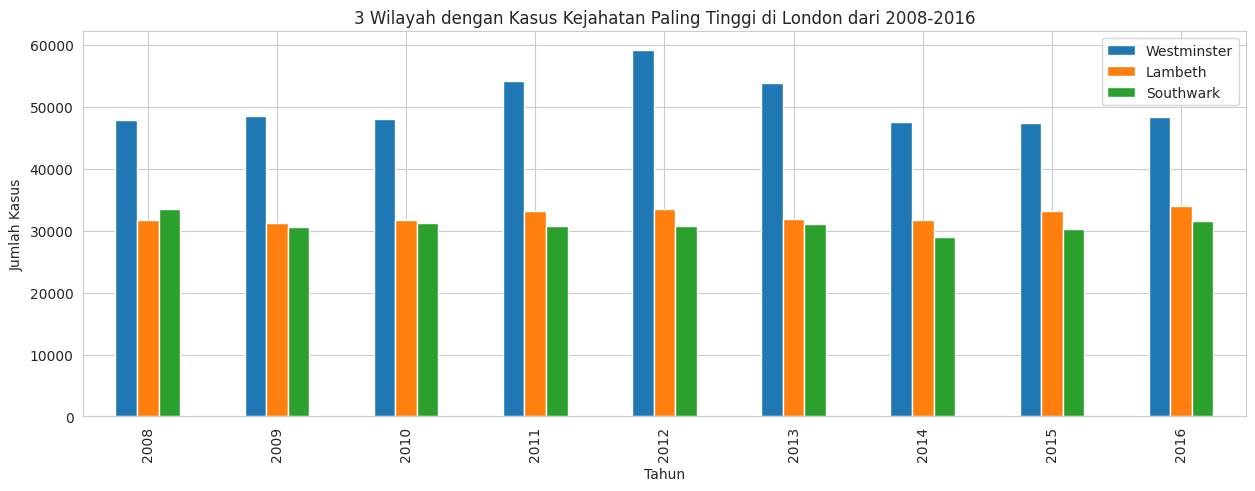

In [90]:
#kejahatan yang paling banyak terjadi
df_crime_borough[year].head(3).T.plot(kind='bar', figsize=(15, 5))
plt.title('3 Wilayah dengan Kasus Kejahatan Paling Tinggi di London dari 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.show()

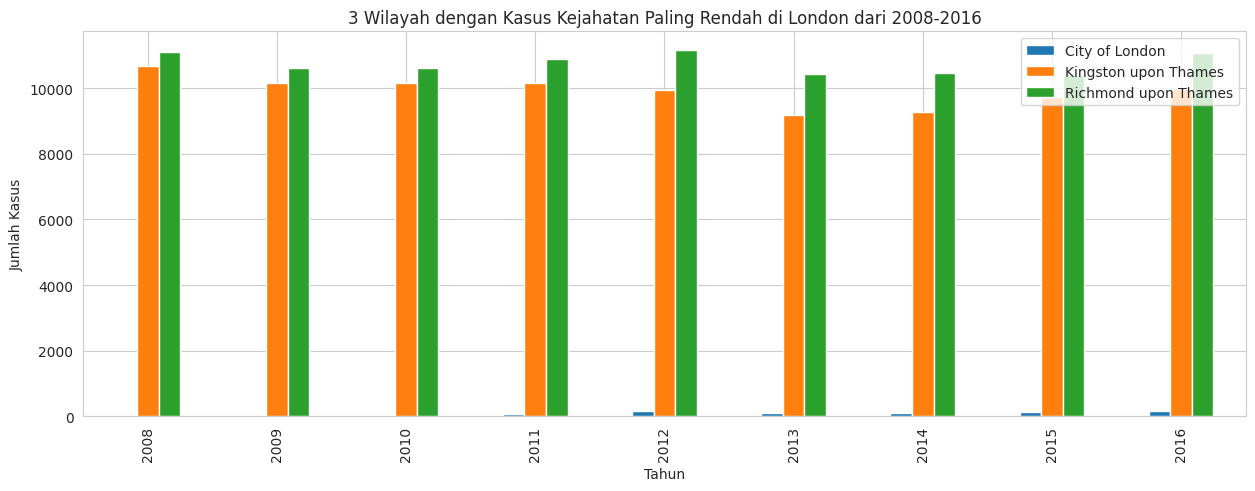

In [91]:
#kejahan yang paling sedikit terjadi
df_crime_borough.sort_values(by='Total')[year].head(3).T.plot(kind='bar', figsize=(15, 5))
plt.legend(loc='upper right')
plt.title('3 Wilayah dengan Kasus Kejahatan Paling Rendah di London dari 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.show()

#### Insight:
Dari visualisasi diatas dapat dilihat bahwa wilayah Westminster memiliki total kasus kejahatan paling tinggi dari tahun 2008-2016 dan puncak paling tinggi berada pada tahun 2012 dengan total 59226 kasus, sedangkan wilayah City of London memiliki total kasus kejahatan paling rendah dari tahun 2008-2016.

##### 3. Pie Chart

Pertanyaan:
1. Berapa persentase tiap tahun kejahatan di wilayah westminster london hingga dinyatakan paling tinggi dalam kurun waktu 2008-1016?

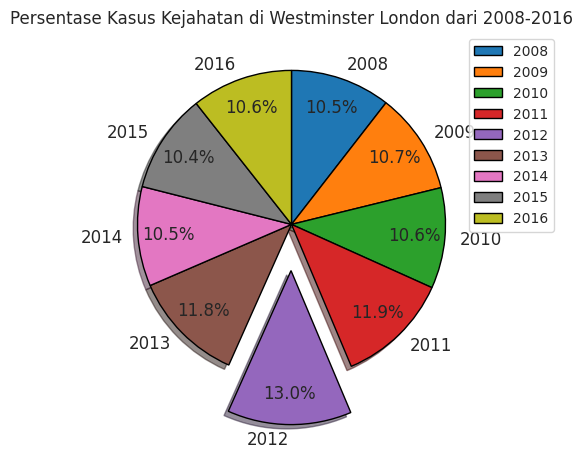

In [92]:
#persentase tiap tahun kejahatan di wilayah westminster london
df_crime_pie = df_crime_borough.loc['Westminster', year].reset_index()
df_crime_pie.columns = ['year', 'value']
df_crime_pie['value'] = df_crime_pie['value'] / df_crime_pie['value'].sum() * 100
df_crime_pie['value'] = df_crime_pie['value'].apply(lambda x: round(x, 2))


#membuat pie chart
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
plt.pie(
    df_crime_pie['value'],
    labels=df_crime_pie['year'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    explode=(0, 0, 0, 0, 0.3, 0, 0, 0, 0),
    shadow=True,
    textprops={'fontsize': 12},
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    pctdistance=0.8,
    labeldistance=1.1
)
plt.title('Persentase Kasus Kejahatan di Westminster London dari 2008-2016')
plt.legend(labels=df_crime_pie['year'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

#### Insight:
Dari visualisasi diatas dapat dilihat bahwa persentase kejahatan di wilayah westminster london paling tinggi berada pada tahun 2012 dengan persentase 13% dari total kejahatan di wilayah westminster london dari tahun 2008-2016.

##### 4. Boxplot

Pertanyaan:
1. Bagaimana distribusi nilai total kasus kejahatan yang terjadi di London setiap tahunnya selama tahun 2008-2016?

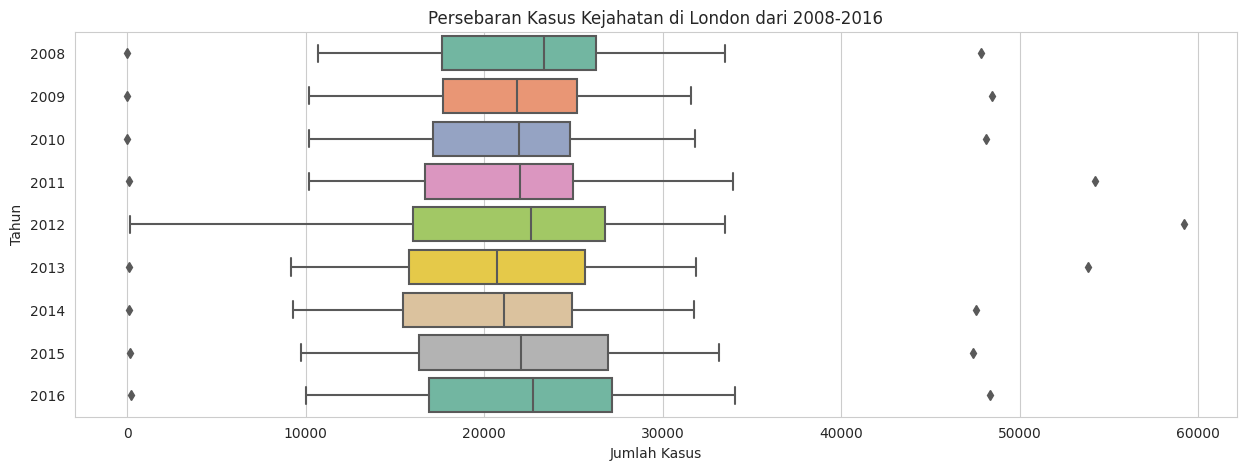

In [93]:
#boxplot untuk melihat persebaran data
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=df_crime_borough[year],
    orient='h',
    palette='Set2'
)
plt.title('Persebaran Kasus Kejahatan di London dari 2008-2016')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Tahun')
plt.show()

#### Insight:
Ada beberapa hal yang bisa dianalisis dari grafik boxplot di atas. 
1. Grafik di atas mempertegas dan memperjelas visualisasi histogram yang sudah dibuat sebelumnya, dimana pada setiap tahunnya  rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar **23.000an - 26.000an** kejadian.
2. Range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, **kecuali 2012**. Range total kasus kejahatan pada tahun **2012** lebih tersebar dibandingkan tahun-tahun lainnya.
3. Melalui boxplot ini juga akan mengonfirmasi adanya total kasus kejahatan dengan nilai yang ekstrim. Nilai esktrim ini ditemukan dari rentang tahun 2008 - 2016. Wilayah **City of London** menjadi wilayah yang relatif tentram, sehingga pada boxplot muncul sebagai *outliers* (ditandai dengan simbol lingkaran). Wilayah **Westminster** menjadi wilayah yang kriminalitasnya relatif tinggi, sehingga pada boxplot muncul sebagai *outliers*

##### 5. Scatter Plot

Pertanyaan:
1. Bagaimana korelasi antara kasus kejahatan tahun 2012 disetiap wilayah london?

In [94]:
df_crime_borough.keys()

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'Total'], dtype='object')

In [95]:
df_crime_borough.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [96]:
df_crime_borough.T.head()

,Westminster,Lambeth,Southwark,Camden,Newham,Croydon,Ealing,Islington,Tower Hamlets,Brent,Hackney,Lewisham,Haringey,Barnet,Hillingdon,Wandsworth,Waltham Forest,Enfield,Hounslow,Hammersmith and Fulham,Bromley,Redbridge,Greenwich,Kensington and Chelsea,Barking and Dagenham,Havering,Harrow,Merton,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London
2008,47846,31717,33470,32010,29752,29516,28947,26273,23578,23504,22004,27054,25724,23944,24318,23330,24080,21980,20204,21114,24015,20873,22010,20663,17656,15395,13774,13875,15305,12943,11106,10661,0
2009,48456,31225,30623,31612,28610,29784,28617,25485,21959,24748,20718,25182,23704,23449,24605,23021,24761,21147,19783,21211,21858,20837,19851,18742,17713,14538,13948,13561,14445,12240,10618,10163,0
2010,48116,31671,31320,31804,30728,29373,31360,24693,23072,25512,20175,24532,22156,23416,23421,22815,24818,20808,19665,21941,19572,20652,18626,19481,17130,14957,13945,13595,13166,12032,10601,10171,0
2011,54243,33224,30723,33956,27978,29830,29537,24980,24712,27669,21395,24201,23179,24007,24282,21384,23714,21041,21105,22151,19868,21994,18552,19146,16686,15496,12801,13548,11325,11068,10896,10155,69
2012,59226,33473,30737,31472,30067,30189,28832,26268,26784,26357,27095,23652,23231,23573,22103,24457,22647,21069,22724,21030,19622,21424,20028,19757,15990,15965,12803,12856,11669,10948,11168,9956,157


In [97]:
df_crime_borough.index

Index(['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham', 'Croydon',
       'Ealing', 'Islington', 'Tower Hamlets', 'Brent', 'Hackney', 'Lewisham',
       'Haringey', 'Barnet', 'Hillingdon', 'Wandsworth', 'Waltham Forest',
       'Enfield', 'Hounslow', 'Hammersmith and Fulham', 'Bromley', 'Redbridge',
       'Greenwich', 'Kensington and Chelsea', 'Barking and Dagenham',
       'Havering', 'Harrow', 'Merton', 'Bexley', 'Sutton',
       'Richmond upon Thames', 'Kingston upon Thames', 'City of London'],
      dtype='object')

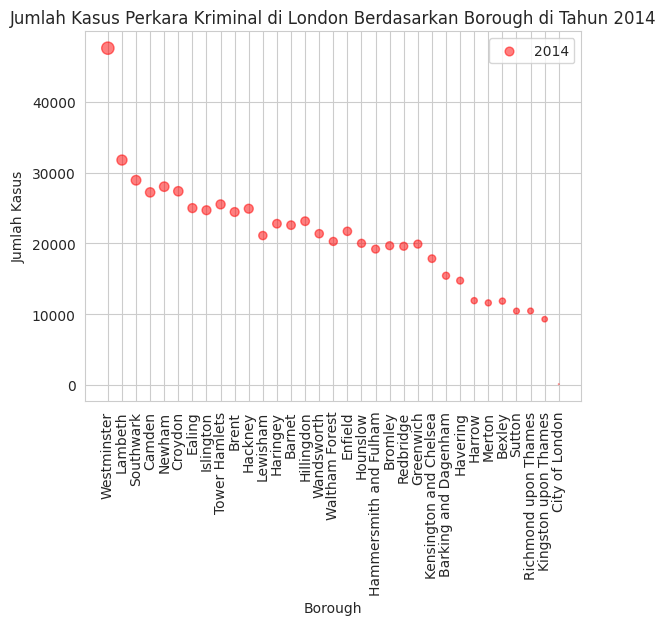

In [98]:
plt.scatter(
    x=df_crime_borough.index,
    y=df_crime_borough[2014],
    s=df_crime_borough[2014]/600,
    c='red',
    alpha=0.5,
)

plt.xlabel('Borough')
plt.legend(labels=['2014'], loc='upper right')
plt.xticks(rotation=90)
plt.ylabel('Jumlah Kasus')
plt.title('Jumlah Kasus Perkara Kriminal di London Berdasarkan Borough di Tahun 2014')
plt.show()

#### Insight:
Westminster menyumbang angka kriminalitas paling tinggi pada tahun 2014 dan dijadikannya sebagai wilayah paling berbahaya, sedangkan city of london menjadi wilayah yang paling tentram.

##### 6. Area Plot

Pertanyaan:
1. Berapa banyak jumlah kasus kejahatan mayor di london selama 2008-2016?

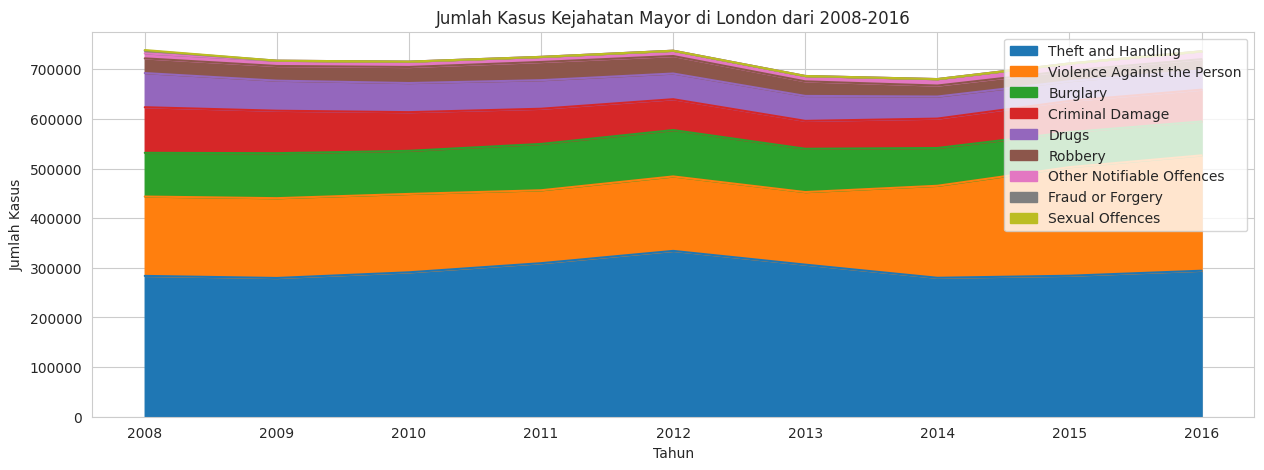

In [99]:
#jumlah kasus kejahatan mayor dan kejahatan minor di london selama 2008-2016 area plot
df_crime_maj[year].T.plot(kind='area', figsize=(15, 5))
plt.legend(loc='upper right')
plt.title('Jumlah Kasus Kejahatan Mayor di London dari 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.show()


#### Insight:
Dari visualisasi diatas dapat dilihat bahwa:
1. Dari tahun 2008-2012 terjadi peningkatan jumlah kasus kejahatan mayor di london, dan pada tahun 2012-2014 terjadi penurunan jumlah kasus kejahatan mayor di london, dan pada tahun 2014-2016 kembali terjadi peningkatan jumlah kasus kejahatan mayor di london.
2. Tahun 2012 menjadi tahun dengan jumlah kasus kejahatan mayor paling tinggi di london.
3. Theft and Handling merupakan jenis kejahatan mayor yang paling banyak terjadi di london.
4. Sexual Offences merupakan jenis kejahatan mayor yang paling sedikit terjadi di london.
5. Kejahatan Theft and handling, voiience against the person cenderung terus meningkat dari tahun ke tahun.

##### 7. Line Plot

1. Bagaimana Tren total kasus kejahatan dari tahun ke tahun diantara tahun 2008-2016?
2. Bagaimana Tren total kasus kejahatan di setiap wilayah london?

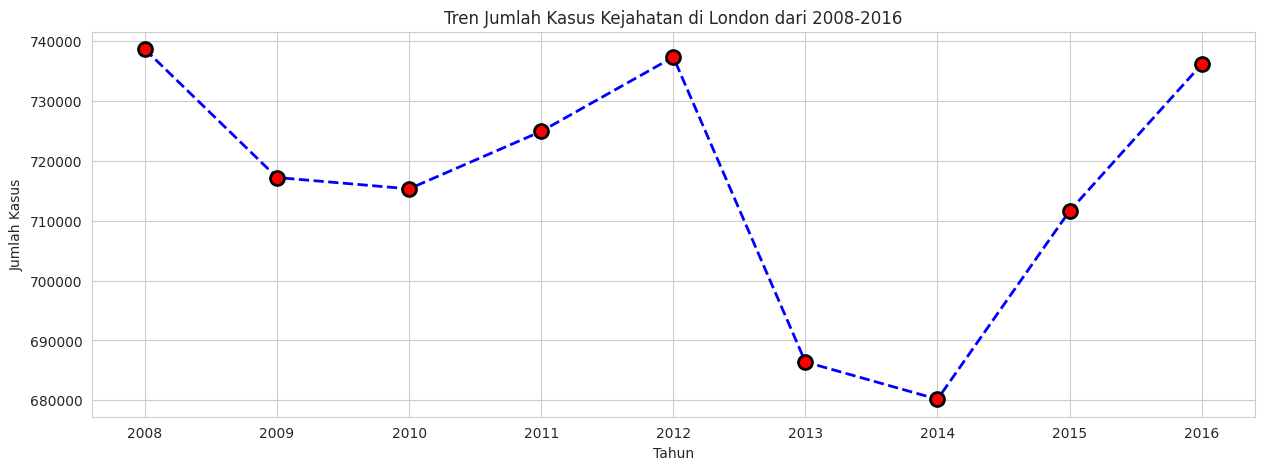

In [100]:
# Tren kejahatan pertahun diantara tahun 2008-2016
df_crime_year = df_crime.groupby('year')['value'].sum().reset_index()
df_crime_year.columns = ['year', 'value']
df_crime_year

#membuat line chart
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=df_crime_year,
    x='year',
    y='value',
    marker='o',
    markersize=10,
    markerfacecolor='red',
    markeredgewidth=2,
    markeredgecolor='black',
    color='blue',
    linewidth=2,
    linestyle='--'
)
plt.title('Tren Jumlah Kasus Kejahatan di London dari 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.show()
    


#### Insight:
1. Kasus kejahatan paling tinggi di london terjadi pada tahun 2008 dengan total 738641 juta kasus kejahatan.
2. Kasus kejahatan paling rendah di london terjadi pada tahun 2014 dengan total 680183 juta kasus kejahatan.
3. Penurusan kasus yang signifikan terjadi dari tahun 2013-2014.Dimana total penukaran kasus kejahatan dari tahun 2013 ke 2014 turun sebesar 5,8%.

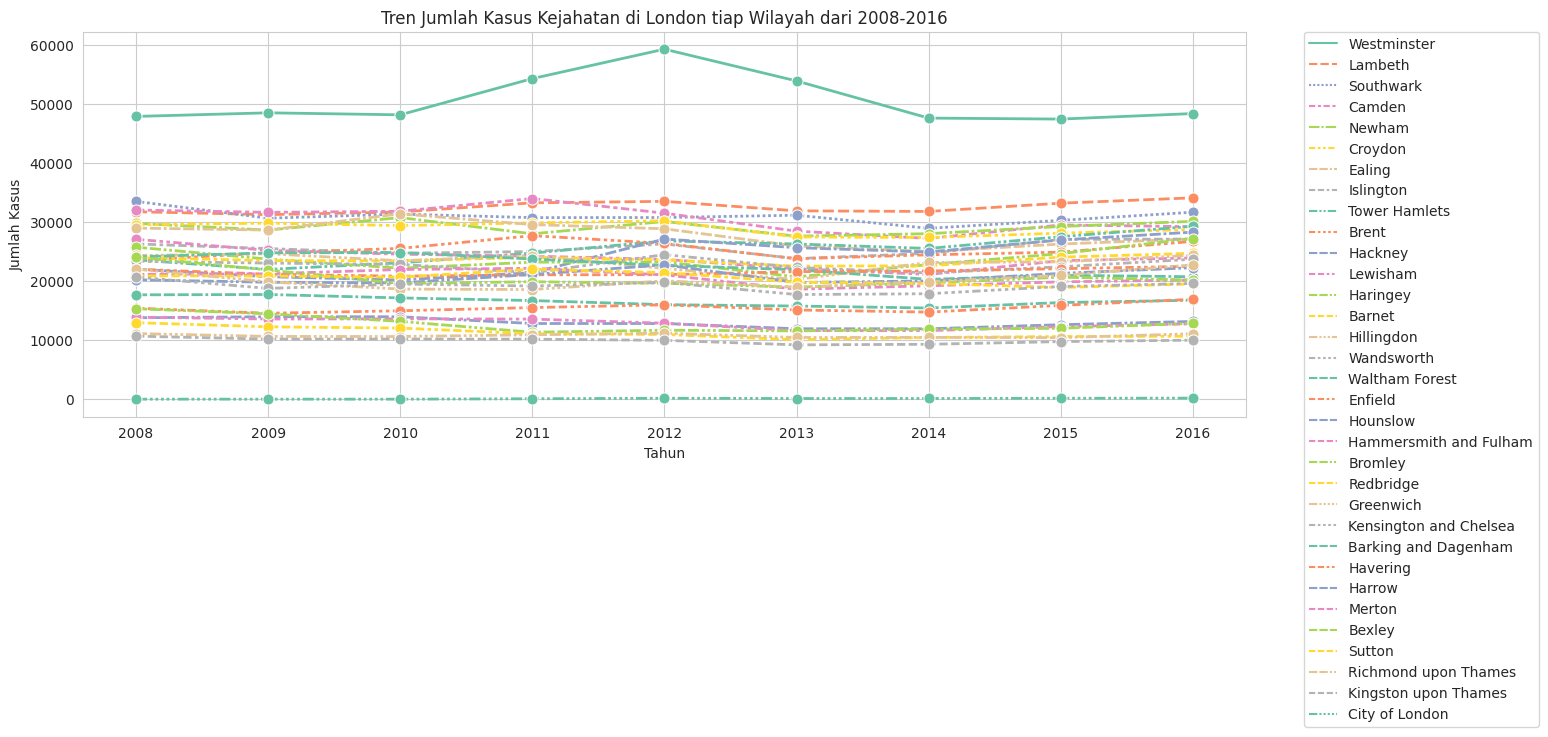

In [101]:
#Tren total kasus kejahatan diseluruh wilayah di london dari tahun 2008-2016
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=df_crime_borough[year].T,
    palette='Set2',
    marker='o',
    markersize=8,
    color='blue',
    linewidth=2,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Tren Jumlah Kasus Kejahatan di London tiap Wilayah dari 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.show()

#### Insight:
1. Wilayah Westminster memiliki total kasus kejahatan paling tinggi dari tahun 2008-2016 dan puncak paling tinggi dan dipastikan wilayah ini termasuk kedalam kategori tidak aman, sedangkan wilayah City of London memiliki total kasus kejahatan paling rendah dari tahun 2008-2016 dan termasuk kedalam kategori wilayah yang aman.


##### 8. Word Clouds

Pertanyaan:
1. Tampilkan word clouds kejahatan minor yang terjadi pada tahun 2014?
2. Tampilkan word cloud kejahatan mayor yang terjadi tahun 2013?

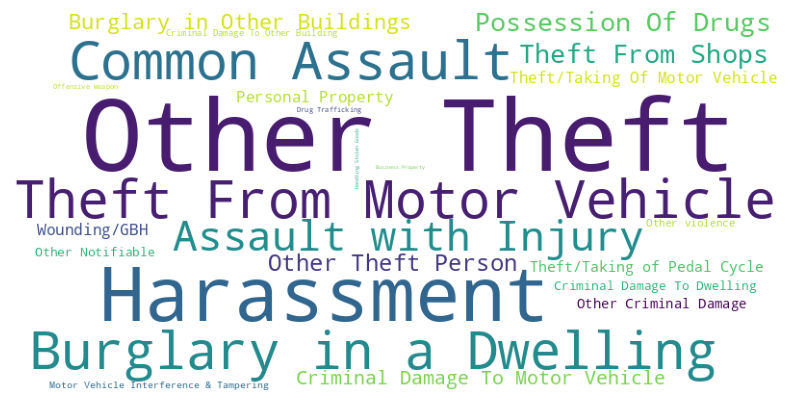

In [102]:
#Tampilkan word clouds kejahatan minor yang terjadi pada tahun 2014?
df_crime_min_2014 = df_crime_min[2014].sort_values(ascending=False)
df_crime_min_2014

#membuat wordcloud
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(df_crime_min_2014)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Insight:
1. Dari word cloud diatas dapat dilihat bahwa Other Theft merupakan kejahatan minor yang paling banyak terjadi pada tahun 2014.
2. Tidak pernah terjadi kejahatan Counted per Victim, Other Fraud & Forgery, Other Sexual, dan Rape pada tahun 2014.

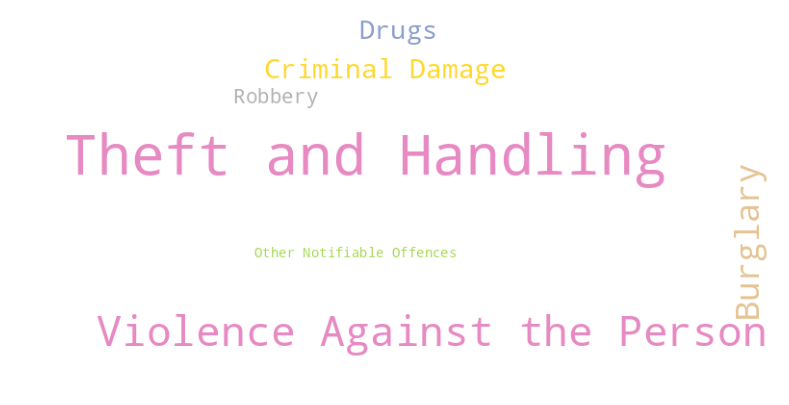

In [103]:
#Tampilkan word clouds kejahatan mayor yang terjadi pada tahun 2013?
df_crime_maj_2013 = df_crime_maj[2013].sort_values(ascending=False)
df_crime_maj_2013

#membuat wordcloud
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    colormap='Set2',
).generate_from_frequencies(df_crime_maj_2013)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Insight:
1. Dari word cloud diatas dapat dilihat Theft and Hanling merupakan kejahatan mayor yang paling banyak terjadi pada tahun 2013.
2. Kejahatan Fraud or Forgery dan Sexual Offences tidak pernah terjadi pada tahun 2013.

##### 9. Folium

Pertanyaan:
1. Gambarkan peta london dengan zoom 10

In [104]:
#Gambarkan peta london dengan zoom 10
london_map = fo.Map(location=[51.5074, 0.1278], zoom_start=10.4)

#marker untuk wilayah westminster
fo.Marker(
    location=[51.4973, -0.1372],
    popup='Westminster',
    icon=fo.Icon(color='red', icon='info-sign')
).add_to(london_map)

#marker untuk wilayah city of london
fo.Marker(
    location=[51.5155, -0.0922],
    popup='City of London',
    icon=fo.Icon(color='green', icon='info-sign')
).add_to(london_map)


#tampilkan peta london
london_map

## Overall Analysis & Saran:

### Analysis:
1. Kejahatan paling tinggi di london berada di wilayah Westminter dengan total kasus 455028 dalam kurun waktu 2008-2016, ini menjadikan bahwa wilayah Westminter menjadi wilayah yang tidak aman. Sedangkan City of London termasuk kategori wilayah paling aman dengan angka kasus hanya 780 dalam kurun waktu 2008-2016.
2. Theft and Handling yang termasuk dalam kejahatan mayor menjadi kejahatan paling sering terjadi pada tahun 2008-2016. Dan ini menandakan bahwa kejahatan ini perlu segera ditangani.
3. Rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar 23000 - 26000 an kejadian.
4. 2008 menjadi puncak tertinggi kasus kejahatan yang terjadi di london.
5. Paa tahun 2014 wilayah Westminter menjadi penyumbang kejahatan tertinggi sehingga menjadikan tempat ini sebagai wilayah yang berbahaya

### Saran:
1. Kejahatan di wilayah Westminter yang selalu naik curva nya harus segera ditangani,karena ini akan sangat membahayakan penduduk di wilayah sana.
2. Theft and Handling dan kejahatan serupa sering terjadi,sehingga masyarakan london harus lebih hati-hati lagi dan menjaga barang berharganya